# Incomplete

- Question:
    - Out of two products with different ratings and number of reviews, which product do the reviews indicate are better?
- Finding out which product to buy with the information of:
    - average rating
    - Number of ratings
    - Proportion of ratings
    - The ratings are done by 1 - 5 therefore this is a discrete problem
- Assumptions:
    - That the initial rating distribution approximates to the population distribution

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def get_avg_rating(rating_distr, n):
    vals = np.random.random(n).reshape(-1,1)
    ratings = 1 + np.argmax(vals < rating_distr.cumsum(), axis=1)
    return ratings.mean()

# Product A (n=100 and 4.1 stars)

In [13]:
rating_distr_a = np.array([.05, .05, .05, .45, .4])                                         #the distribution
n_a = 100                                                                                    #100 samples from the distribution
# MonteCarlo simulation
samp_means_a = np.array([get_avg_rating(rating_distr_a, n_a) for _ in range(10000)])

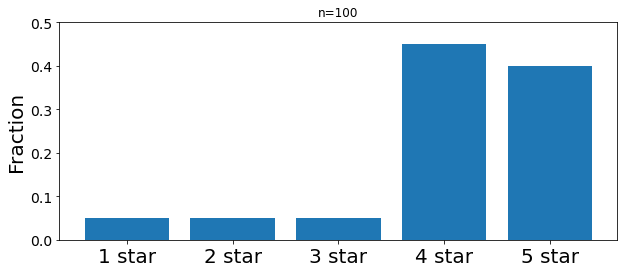

In [14]:
# assumption that this is the population distribution
plt.figure(figsize=(10,4))
plt.bar([str(i)+ ' star' for i in np.arange(1,6)], rating_distr_a)
plt.xticks(np.arange(5), fontsize=20)
plt.yticks(np.arange(0,.6,.1), fontsize=14)
plt.ylabel("Fraction", fontsize=20)
plt.title(f"n={n_a}")
plt.show()

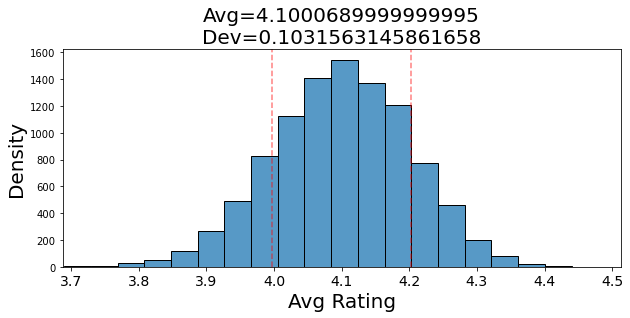

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(samp_means_a, bins=20)
plt.xlabel("Avg Rating", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.xticks(np.arange(0,5.1,.1),fontsize=14)                  #where ticks will be placed within boundaries of xlim
mu, dev = samp_means_a.mean(), samp_means_a.std()
plt.xlim(mu-4*dev, mu+4*dev)                                 #the minimum and maximum for x-axis
plt.title(f"Avg={mu}\nDev={dev}", fontsize=20)
plt.axvline(mu+dev, color='r', linestyle="--", alpha=0.5)    #vertical line for
plt.axvline(mu-dev, color='r', linestyle="--", alpha=0.5)    #vertical line for 
plt.show()

taking multiple samples of the size of 100, this is the distribution of those samples. The experiment shows an average of 4.1 and a standard deviation of 0.1. As the distribution is a Gaussian, we can approximate that around 68% of the sample means are between 4.1±0.10

# Product B (n=1000 and 4 star average)

In [16]:
rating_distr_b = np.array([.05, .05, .05, .55, .3])                                         #the distribution
n_b = 1000                                                                                  #100 samples from the distribution
# MonteCarlo simulation
samp_means_b = np.array([get_avg_rating(rating_distr_b, n_b) for _ in range(10000)])

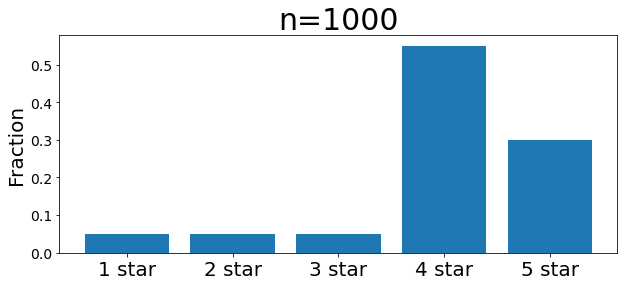

In [17]:
# assumption that this is the population distribution
plt.figure(figsize=(10,4))
plt.bar([str(i)+ ' star' for i in np.arange(1,6)], rating_distr_b)
plt.xticks(np.arange(5), fontsize=20)
plt.yticks(np.arange(0,.6,.1), fontsize=14)
plt.ylabel("Fraction", fontsize=20)
plt.title(f"n={n_b}",fontsize=30)
plt.show()

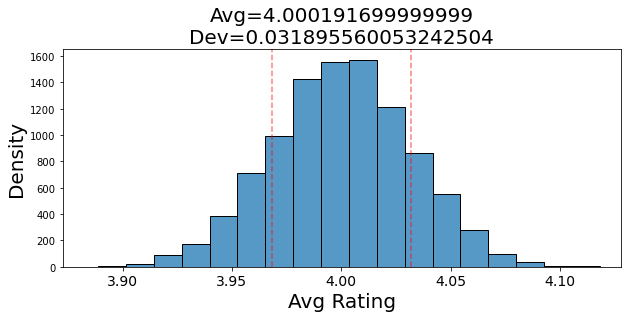

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(samp_means_b, bins=20)
plt.xlabel("Avg Rating", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.xticks(np.arange(0,5.05,.05),fontsize=14)                #where ticks will be placed within boundaries of xlim
mu, dev = samp_means_b.mean(), samp_means_b.std()
plt.xlim(mu-4*dev, mu+4*dev)                                 #the minimum and maximum for x-axis
plt.title(f"Avg={mu}\nDev={dev}", fontsize=20)
plt.axvline(mu+dev, color='r', linestyle="--", alpha=0.5)    #vertical line for
plt.axvline(mu-dev, color='r', linestyle="--", alpha=0.5)    #vertical line for 
plt.show()

Taking multiple samples of the size of 1000, this is the distribution of those samples. The experiment shows an average of 4.0 and a standard deviation of 0.03. As the distribution is a Gaussian, we can approximate that around 68% of the sample means are between 4.0±0.03.

# Plot Together 

C:\Users\james\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\james\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


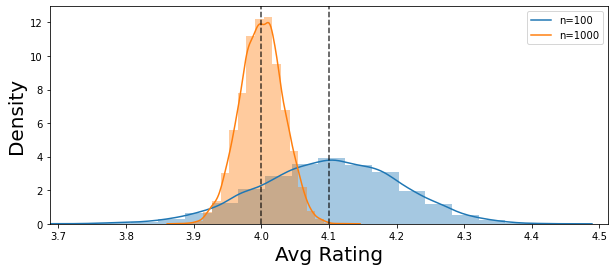

In [19]:
plt.figure(figsize=(10,4))
sns.distplot(samp_means_a, bins=20)
sns.distplot(samp_means_b, bins=20)
plt.xlabel("Avg Rating", fontsize=20)
plt.ylabel("Density", fontsize=20)

mu, dev = samp_means_a.mean(), samp_means_a.std()
plt.xlim(mu-4*dev, mu+4*dev)

plt.legend([f"n={n_a}", f"n={n_b}"])

plt.axvline(samp_means_a.mean(), color='k', alpha=0.75, linestyle="--")
plt.axvline(samp_means_b.mean(), color='k', alpha=0.75, linestyle="--")
plt.show()

It is not clear which is better to choose. By comparing the mean samples for example A and B, the below image shows that for 82% percent of the time, 

C:\Users\james\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


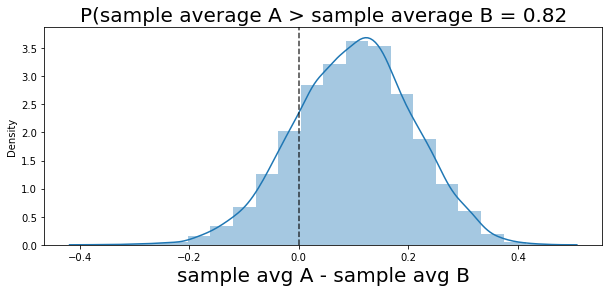

In [20]:
prob_large_samp_greater_small_samp = (samp_means_a > samp_means_b).mean()
plt.figure(figsize=(10,4))
sns.distplot(samp_means_a - samp_means_b, bins=20)
plt.xlabel("sample avg A - sample avg B", fontsize=20)
plt.axvline(0, color='k', alpha=0.75, linestyle="--")
plt.title(f"P(sample average A > sample average B = {prob_large_samp_greater_small_samp:.2f}", fontsize=20)
plt.show()

# What if do not take the assumption that the initial rating distribution is the same as the population distribution? 

- This can be due to **Volunteer Bias**
    - A way is by using **Bayes theory**:
        - If we have the rating distribution of A (.05, .05, .05, .45, .4), these can be interpreted as:
            - 0.05 = P(1*| person rates) = ( P(person rates | 1*) * P(1*) ) / (p(person rates))
            - 0.05 = P(2*| person rates) = ( P(person rates | 2*) * P(2*) ) / (p(person rates))
            - 0.05 = P(3*| person rates) = ( P(person rates | 3*) * P(3*) ) / (p(person rates))
            - 0.45 = P(4*| person rates) = ( P(person rates | 4*) * P(4*) ) / (p(person rates))
            - 0.4 = P(5*| person rates) = ( P(person rates | 5*) * P(5*) ) / (p(person rates))
        - we are trying to find P(*num*) from the equation. How to find the other aspects
            - p(person rates) == we can find this by doing (people who rate / number of buyers)
            - P(person rates | 1*) == this is more difficult, we could use research papers to get a gist of how many people actually rate for different qualities for a product or we can do our own research such as through a focus groups (depends on the resources for the project)

## references:
- [Which would you buy? | ritvikmath (youtube)](https://www.youtube.com/watch?v=7cupIlG7-D0)
    - at this moment, the identical code
- [Can You Solve the Ratings Problem? | ritvikmath (youtube)](https://www.youtube.com/watch?v=UMHQPStCk2w)